dddad99c-0f8f-468b-8a5b-9fbfb3644cd4
2019-09-06


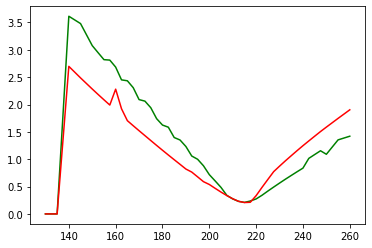

2019-09-13


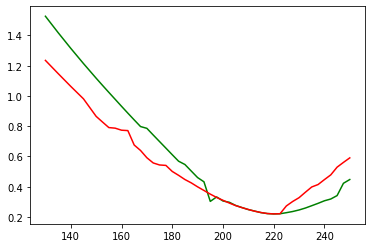

2019-09-20


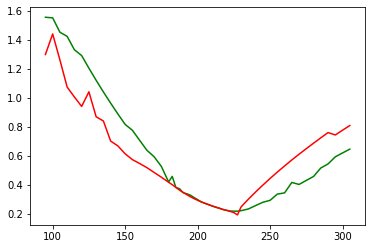

2019-09-27


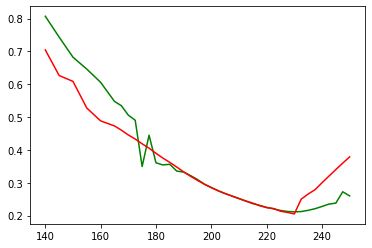

2019-10-04


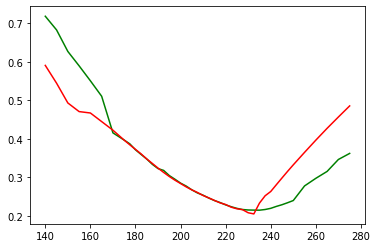

2019-10-11


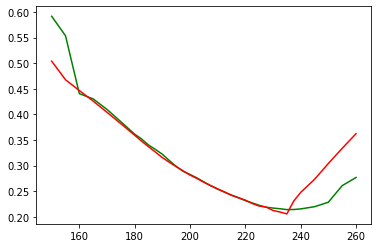

2019-10-18


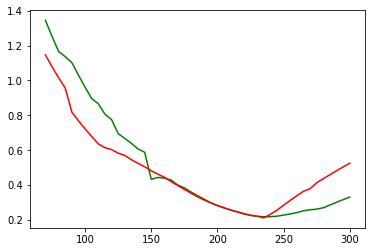

2019-10-25


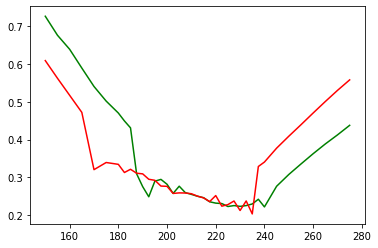

2019-11-15


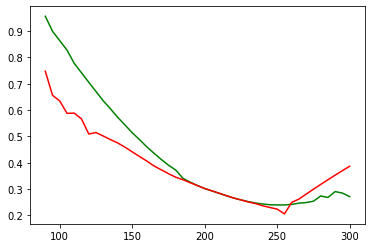

2019-12-20


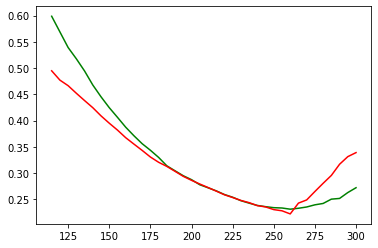

2020-01-17


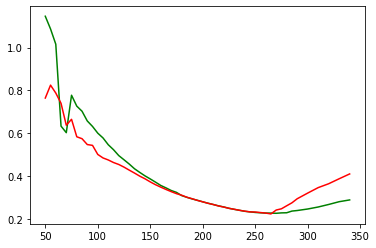

2020-03-20


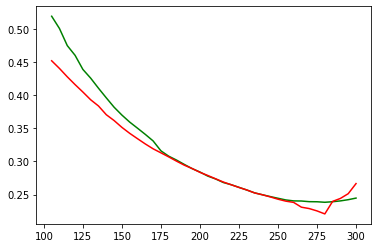

2020-04-17


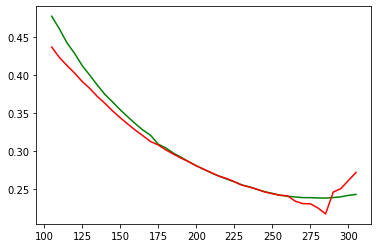

2020-06-19


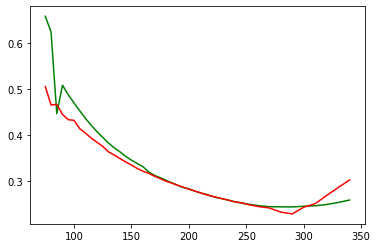

2020-09-18


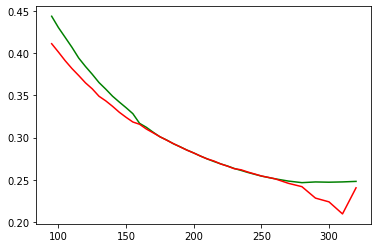

2021-01-15


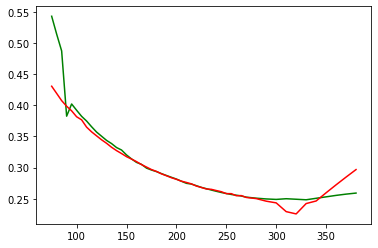

2021-06-18


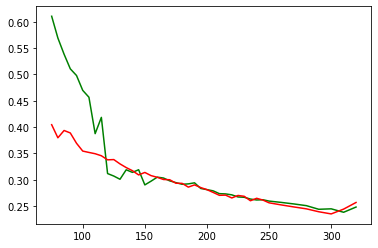

In [25]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

from tools_and_infra.loaders.ORATS import ORATSLoader


class VolSurface:
    def __init__(self, ticker: str, date: pd.Timestamp):
        self.options = ORATSLoader().get_options_for_date_and_tickers(tickers=[ticker], date=date)
    
    def create_implied_volatility_smile(self):
        tenors = self.options['expirDate'].unique()
        opts = self.options
        for tenor in tenors:
            print(tenor)
            bid_ivs = opts[opts['expirDate'] == tenor][['callBidIv', 'callMidIv', 'callAskIv', 'putBidIv', 'putMidIv', 'putAskIv', 'strike']]
            plt.plot(bid_ivs['strike'], bid_ivs['callMidIv'], "-g")
            plt.plot(bid_ivs['strike'], bid_ivs['putMidIv'], "-r")
            plt.show()
            
if __name__ == '__main__':
    vs = VolSurface(ticker="AAPL", date=pd.to_datetime("2019-09-05"))
    vs.create_implied_volatility_smile()

In [39]:
from tools_and_infra.loaders.ORATS import ORATSLoader
import pandas as pd

df = pd.DataFrame([
 { 'date': pd.to_datetime('2020-12-05'), 'asset1': -0.05, 'asset2': -0.01, 'asset3': 0.02, },
 { 'date': pd.to_datetime('2020-12-06'), 'asset1': -0.01, 'asset2': 0.01, 'asset3': 0.03, },
 { 'date': pd.to_datetime('2020-12-07'), 'asset1': 0.03, 'asset2': 0, 'asset3': 0.01, },
 { 'date': pd.to_datetime('2020-12-08'), 'asset1': 0.02, 'asset2': 0.02, 'asset3': 0, },
 { 'date': pd.to_datetime('2020-12-09'), 'asset1': 0.08, 'asset2': 0.03, 'asset3': -0.01, },
 { 'date': pd.to_datetime('2020-12-10'), 'asset1': -0.10, 'asset2': 0.05, 'asset3': -0.01, },
 { 'date': pd.to_datetime('2020-12-11'), 'asset1': -0.05, 'asset2': -0.08, 'asset3': 0.025, },
 { 'date': pd.to_datetime('2020-12-12'), 'asset1': -0.03, 'asset2': -0.01, 'asset3': 0.06, },
 { 'date': pd.to_datetime('2020-12-13'), 'asset1': 0.04, 'asset2': 0, 'asset3': -0.04, },
])

In [72]:
import seaborn as sns

c = df[['asset1', 'asset2', 'asset3']].rolling(8).corr().dropna()
c = c.stack().reset_index()
c.columns = ['time', 'asset1', 'asset2', 'correlation']
for q in c['asset1'].unique():
    for r in c['asset2'].unique():
        print(c.query('asset1 == @q and asset2 == @r'))

   time  asset1  asset2  correlation
0     7  asset1  asset1          1.0
9     8  asset1  asset1          1.0
    time  asset1  asset2  correlation
1      7  asset1  asset2     0.172903
10     8  asset1  asset2     0.133596
    time  asset1  asset2  correlation
2      7  asset1  asset3    -0.229943
11     8  asset1  asset3    -0.352664
    time  asset1  asset2  correlation
3      7  asset2  asset1     0.172903
12     8  asset2  asset1     0.133596
    time  asset1  asset2  correlation
4      7  asset2  asset2          1.0
13     8  asset2  asset2          1.0
    time  asset1  asset2  correlation
5      7  asset2  asset3    -0.542386
14     8  asset2  asset3    -0.397858
    time  asset1  asset2  correlation
6      7  asset3  asset1    -0.229943
15     8  asset3  asset1    -0.352664
    time  asset1  asset2  correlation
7      7  asset3  asset2    -0.542386
16     8  asset3  asset2    -0.397858
    time  asset1  asset2  correlation
8      7  asset3  asset3          1.0
17     8  asset

asset1    asset2    asset3
4 asset1  1.000000  0.818902 -0.818902
  asset2  0.818902  1.000000 -0.700000
  asset3 -0.818902 -0.700000  1.000000
5 asset1  1.000000 -0.535042  0.026936
  asset2 -0.535042  1.000000 -0.730109
  asset3  0.026936 -0.730109  1.000000
6 asset1  1.000000  0.131751 -0.163981
  asset2  0.131751  1.000000 -0.958373
  asset3 -0.163981 -0.958373  1.000000
7 asset1  1.000000  0.162051 -0.219926
  asset2  0.162051  1.000000 -0.581884
  asset3 -0.219926 -0.581884  1.000000
8 asset1  1.000000  0.110536 -0.375705
  asset2  0.110536  1.000000 -0.438773
  asset3 -0.375705 -0.438773  1.000000

In [1]:
from tools_and_infra.loaders.AlphaVantage import AlphaVantageLoader

l = AlphaVantageLoader()


In [3]:
SPDR_ETFS = [
    'XTL',
    'XRT',
    'XOP',
    'XME',
    'XLY',
    'XLV',
    'XLU',
    'XLP',
    'XLK',
    'XLI',
    'XLF',
    'XLE',
    'XLB',
    'XHB',
    'VNQ',
    'SMH',
    'OIH',
    'KRE',
    'KBE',
    'IYR',
    'ITB',
    'IBB',
    'GDXJ',
    'GDX',
    'SPY',
    'DIA',
    'IWM',
    'QQQ',
]
for etf in SPDR_ETFS:
    print(etf)
    l.get_complete_intraday_equity_data(symbol = etf, interval = '60m')

XTL
XRT
XOP
XME
XLY
XLV
XLU
XLP
XLK
XLI
XLF
XLE
XLB
XHB
VNQ
SMH
OIH
KRE
KBE
IYR


SPY


100%|███████████████████████████████████████████| 24/24 [06:08<00:00, 15.37s/it]


KeyError: 'time'

In [10]:
SPDR_ETFS = [
    'XTL',
    'XRT',
    'XOP',
    'XME',
    'XLY',
    'XLV',
    'XLU',
    'XLP',
    'XLK',
    'XLI',
    'XLF',
    'XLE',
    'XLB',
    'XHB',
    'VNQ',
    'SMH',
    'OIH',
    'KRE',
    'KBE',
    'IYR',
]
for etf in SPDR_ETFS:
    print(l.get_complete_intraday_equity_data(symbol = etf, interval = '1d'))

                 open       high        low      close   volume
time                                                           
2019-11-04  66.082294  66.456881  65.994431  66.023719   2731.0
2019-11-05  66.628993  66.687568  66.541131  66.541131   1953.0
2019-11-06  65.818707  65.818707  65.086520  65.311057   3471.0
2019-11-07  66.168497  66.404456  66.111581  66.354960  59335.0
2019-11-08  66.619231  67.449042  66.619231  67.409992   9492.0
...               ...        ...        ...        ...      ...
2021-10-18  95.612900  96.100000  95.612900  95.750000   1997.0
2021-10-19  96.140000  96.470000  95.640000  96.180000   2007.0
2021-10-20  96.080000  97.390000  96.080000  97.120000   5282.0
2021-10-21  97.485800  97.485800  97.485800  97.485800    102.0
2021-10-22  96.520000  96.520000  95.290000  95.290000   3321.0

[719 rows x 5 columns]
                 open       high        low      close     volume
time                                                             
2019-11-04  

/Users/lilyfrancus/tools-and-infra/venv/lib/python3.8/site-packages/cache_decorator/backends/backend.py:70: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  return backend.load(metadata, path)


                  open        high         low       close     volume
time                                                                 
2020-06-01   75.110705   77.211095   74.723536   76.659379  6006398.0
2020-06-02   77.414358   77.569226   76.533550   77.569226  6013842.0
2020-06-03   78.004790   80.027746   78.004790   79.679294  8988692.0
2020-06-04   79.311484   79.621219   78.256450   79.001749  6149077.0
2020-06-05   81.624816   83.347717   81.528024   81.876476  8554053.0
...                ...         ...         ...         ...        ...
2021-10-18  106.800000  107.800000  106.520000  107.300000  4271149.0
2021-10-19  107.880000  108.210000  107.500000  108.020000  3659957.0
2021-10-20  107.750000  109.260000  107.750000  109.230000  4371784.0
2021-10-21  109.190000  109.500000  108.960000  109.500000  5462459.0
2021-10-22  109.740000  110.330000  109.540000  109.940000  7828799.0

[509 rows x 5 columns]


In [41]:
import pandas as pd
from typing import Dict
from tools_and_infra.utils import utils

def construct_flat_returns_comparison(returns: Dict[str, pd.DataFrame], ohlc_col = 'close'):
    latest = None
    earliest = None
    # Align equity returns for latest start, earliest end available between return series
    for symbol, ret in returns.items():
        print(latest, earliest)
        if latest:
            latest = max(ret.index[0], latest)
        else:
            latest = ret.index[0]
        if earliest:
            earliest = min(ret.index[-1], earliest)
        else:
            earliest = ret.index[-1]
    returnz = []
    # Rename the columns to differentiate/preserve OHLCV for each return series
    for symbol, ret in returns.items():
        d = ret.query('time >= @latest and time <= @earliest')[['open', 'high', 'low', 'close', 'volume']]
        d.columns = [x + "_" + symbol for x in ['open', 'high', 'low', 'close', 'volume']]
        returnz.append(d)
    df = returnz[0]
    returnz = returnz[1:]
    # Merge all dataframes together
    for ret in returnz:
        df = df.merge(ret, left_index=True, right_index=True)
    return df
    
def resample_equity_intraday_only(df):
    return utils.resample_ohlcv_time_series(utils.get_intraday_ohlcv(df), interval='1d', coerce_datetime_column='time')

d = resample_equity_intraday_only(pd.read_csv('cache/AAPL_complete_1min_intraday.csv'))
e = resample_equity_intraday_only(pd.read_csv('cache/KBE_complete_1min_intraday.csv'))
f = resample_equity_intraday_only(pd.read_csv('cache/SMH_complete_1min_intraday.csv'))
x = resample_equity_intraday_only(pd.read_csv('cache/XLB_complete_1min_intraday.csv'))
equity_returns = construct_flat_returns_comparison({"AAPL": d, "KBE": e, "SMH": f, "XLB": x})

100%|████████████████████████████████| 198831/198831 [00:14<00:00, 13559.70it/s]


None None
2019-11-04 00:00:00 2021-10-22 00:00:00
2019-11-04 00:00:00 2021-10-22 00:00:00
2019-11-04 00:00:00 2021-10-22 00:00:00


In [57]:
import seaborn
import numpy as np

df = equity_returns[['close_AAPL', 'close_KBE', 'close_SMH', 'close_XLB']].pct_change(1)[1:]
print(df.index.apply(lambda x: 1))


DatetimeIndex(['2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
               '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22'],
              dtype='datetime64[ns]', name='time', length=718, freq='D')
